In [1]:
# Simple Regional Time Window Generator
# This notebook processes regional CSV files from prepare_catalog and creates time windows

import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Add core module to path
sys.path.append('../core')

from time_window_selector import (
    generate_sequential_windows,
    generate_random_windows,
    save_windows
)

SECONDS_PER_YEAR = 365.25 * 24 * 3600

%matplotlib inline
plt.style.use('default')
sns.set_palette("Set2")

In [2]:
# =============================================================================
# STEP 1: CONFIGURATION
# =============================================================================

# Update these paths to match your setup
REGIONAL_CATALOGS_DIR = "../data/Catalog_4983/regional_catalogs2"
OUTPUT_DIR = "../data/Catalog_4983/windows"
MAGNITUDE_THRESHOLD = 5.0  # Should match what you used in prepare_catalog

# Window parameters
WINDOW_LENGTH_YEARS = 50000
OVERLAP_FRACTION = 0.0
MIN_EVENTS_PER_WINDOW = 0

print(f"Looking for regional catalogs in: {REGIONAL_CATALOGS_DIR}")
print(f"Output directory: {OUTPUT_DIR}")
print(f"Processing M{MAGNITUDE_THRESHOLD}+ catalogs")


Looking for regional catalogs in: ../data/Catalog_4983/regional_catalogs2
Output directory: ../data/Catalog_4983/windows
Processing M5.0+ catalogs


In [3]:
# =============================================================================
# STEP 2: FIND REGIONAL CSV FILES
# =============================================================================

def find_regional_csv_files(base_dir, mag_threshold):
    """Find all M5.0+ CSV files created by prepare_catalog"""
    regional_files = {}
    pattern = f"*_M{mag_threshold}plus.csv"
    
    for region_dir in Path(base_dir).iterdir():
        if region_dir.is_dir():
            region_name = region_dir.name
            csv_files = list(region_dir.glob(pattern))
            
            if csv_files:
                # Prefer hypocenter files, but use centroid if that's all we have
                hypocenter_files = [f for f in csv_files if 'hypocenter' in f.name]
                centroid_files = [f for f in csv_files if 'centroid' in f.name]
                
                if hypocenter_files:
                    regional_files[region_name] = hypocenter_files[0]
                elif centroid_files:
                    regional_files[region_name] = centroid_files[0]
    
    return regional_files

# Find the regional CSV files
regional_csv_files = find_regional_csv_files(REGIONAL_CATALOGS_DIR, MAGNITUDE_THRESHOLD)

print(f"\nFound {len(regional_csv_files)} regional CSV files:")
for region, file_path in regional_csv_files.items():
    print(f"  {region}: {file_path.name}")

if not regional_csv_files:
    print("❌ No regional CSV files found!")
    print("Make sure you've run the prepare_catalog notebook first.")


Found 7 regional CSV files:
  san_francisco: san_francisco_hypocenter_M5.0plus.csv
  mojave: mojave_hypocenter_M5.0plus.csv
  los_angeles: los_angeles_hypocenter_M5.0plus.csv
  north_cal: north_cal_hypocenter_M5.0plus.csv
  mid_angeles: mid_angeles_hypocenter_M5.0plus.csv
  central_coast: central_coast_hypocenter_M5.0plus.csv
  Full_california: Full_california_hypocenter_M5.0plus.csv


In [4]:
def prepare_csv_for_time_windows(csv_path):
    """Load regional CSV and convert time to years while preserving all columns"""
    
    print(f"\nLoading: {csv_path.name}")
    df = pd.read_csv(csv_path)
    print(f"  Original events: {len(df)}")
    
    # Convert occurrence time from seconds to years (only modification needed)
    if 'Occurrence Time (s)' in df.columns:
        df['Occurrence Time (s)'] = df['Occurrence Time (s)'] / SECONDS_PER_YEAR
        print(f"  Converted time from seconds to years")
    else:
        print(f"  ❌ Missing 'Occurrence Time (s)' column")
        return None
    
    # Show summary
    time_span = df['Occurrence Time (s)'].max() - df['Occurrence Time (s)'].min()
    print(f"  Time span: {time_span:.1f} years")
    print(f"  Magnitude range: {df['Magnitude'].min():.2f} - {df['Magnitude'].max():.2f}")
    if 'Magnitude' in df.columns:
        print(f"  Events M≥7: {len(df[df['Magnitude'] >= 7.0])}")
    
    return df


Processing Region: SAN_FRANCISCO

Loading: san_francisco_hypocenter_M5.0plus.csv
  Original events: 2491359
  Converted time from seconds to years
  Time span: 714032.3 years
  Magnitude range: 5.00 - 8.06
  Events M≥7: 17474

Generating time windows...
  Window 1: 174424 events, time 64971.9 - 114971.9
  Window 2: 174470 events, time 114971.9 - 164971.9
  Window 3: 173530 events, time 164971.9 - 214971.9
  Window 4: 174061 events, time 214971.9 - 264971.9
  Window 5: 173777 events, time 264971.9 - 314971.9
  Window 6: 173928 events, time 314971.9 - 364971.9
  Window 7: 173886 events, time 364971.9 - 414971.9
  Window 8: 174259 events, time 414971.9 - 464971.9
  Window 9: 175482 events, time 464971.9 - 514971.9
  Window 10: 174638 events, time 514971.9 - 564971.9
  Window 11: 175248 events, time 564971.9 - 614971.9
  Window 12: 174973 events, time 614971.9 - 664971.9
  Window 13: 174301 events, time 664971.9 - 714971.9
  Window 14: 175163 events, time 714971.9 - 764971.9
  Window 15: 

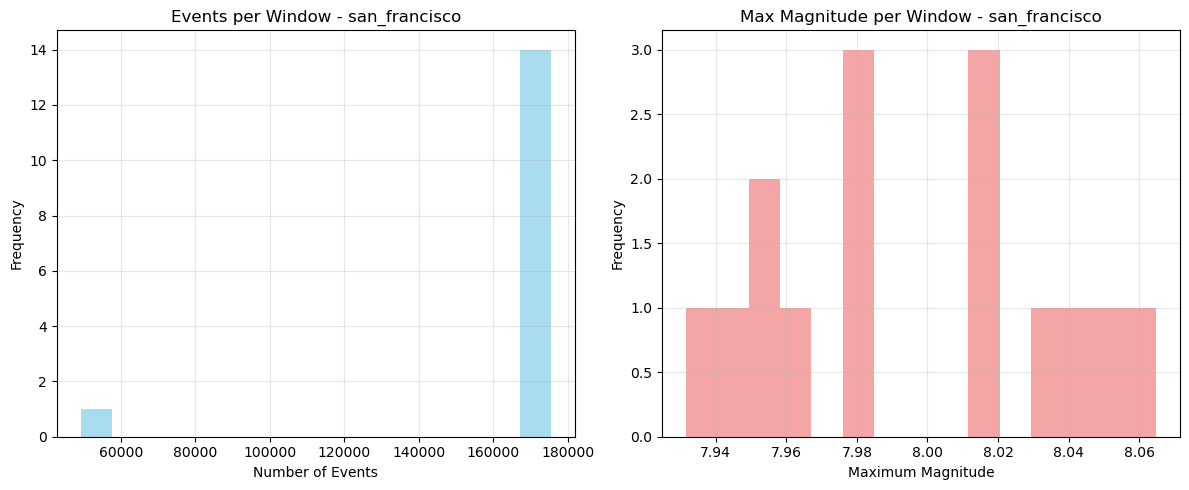

✓ Region san_francisco completed successfully

Processing Region: MOJAVE

Loading: mojave_hypocenter_M5.0plus.csv
  Original events: 570570
  Converted time from seconds to years
  Time span: 714032.5 years
  Magnitude range: 5.00 - 8.02
  Events M≥7: 17815

Generating time windows...
  Window 1: 39375 events, time 64971.6 - 114971.6
  Window 2: 39143 events, time 114971.6 - 164971.6
  Window 3: 39780 events, time 164971.6 - 214971.6
  Window 4: 39353 events, time 214971.6 - 264971.6
  Window 5: 39870 events, time 264971.6 - 314971.6
  Window 6: 40534 events, time 314971.6 - 364971.6
  Window 7: 40158 events, time 364971.6 - 414971.6
  Window 8: 40823 events, time 414971.6 - 464971.6
  Window 9: 40125 events, time 464971.6 - 514971.6
  Window 10: 39780 events, time 514971.6 - 564971.6
  Window 11: 39973 events, time 564971.6 - 614971.6
  Window 12: 39934 events, time 614971.6 - 664971.6
  Window 13: 40547 events, time 664971.6 - 714971.6
  Window 14: 40168 events, time 714971.6 - 76497

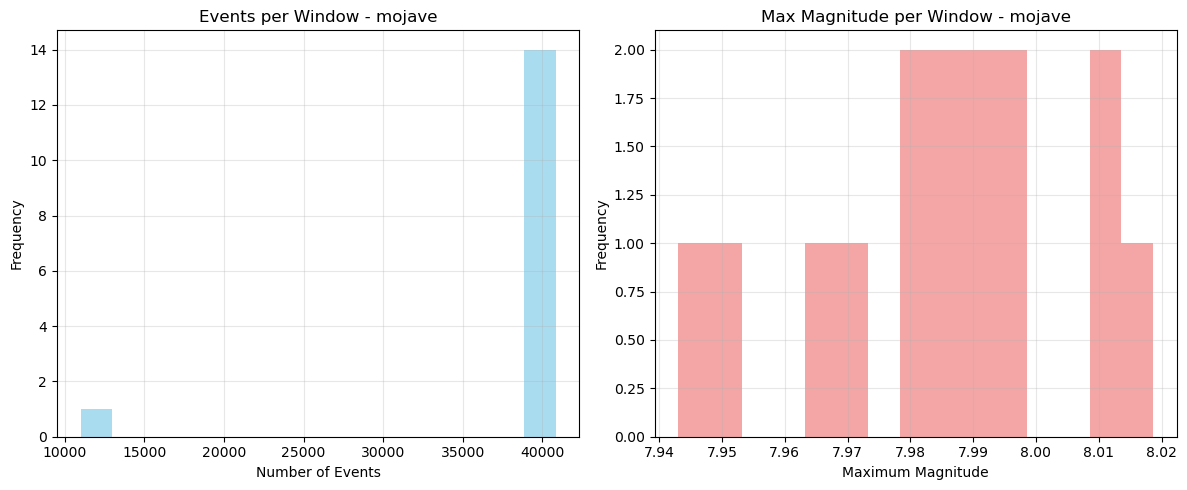

✓ Region mojave completed successfully

Processing Region: LOS_ANGELES

Loading: los_angeles_hypocenter_M5.0plus.csv
  Original events: 632011
  Converted time from seconds to years
  Time span: 714030.2 years
  Magnitude range: 5.00 - 8.00
  Events M≥7: 12466

Generating time windows...
  Window 1: 44088 events, time 64972.8 - 114972.8
  Window 2: 44550 events, time 114972.8 - 164972.8
  Window 3: 44438 events, time 164972.8 - 214972.8
  Window 4: 44076 events, time 214972.8 - 264972.8
  Window 5: 44446 events, time 264972.8 - 314972.8
  Window 6: 44584 events, time 314972.8 - 364972.8
  Window 7: 44270 events, time 364972.8 - 414972.8
  Window 8: 44282 events, time 414972.8 - 464972.8
  Window 9: 44146 events, time 464972.8 - 514972.8
  Window 10: 44052 events, time 514972.8 - 564972.8
  Window 11: 44643 events, time 564972.8 - 614972.8
  Window 12: 44036 events, time 614972.8 - 664972.8
  Window 13: 43780 events, time 664972.8 - 714972.8
  Window 14: 44264 events, time 714972.8 - 76

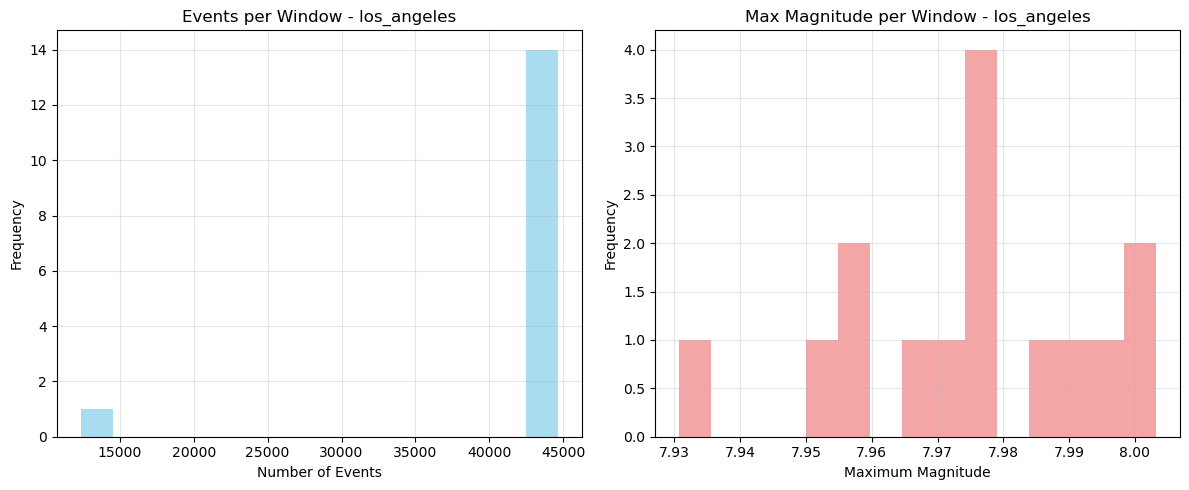

✓ Region los_angeles completed successfully

Processing Region: NORTH_CAL

Loading: north_cal_hypocenter_M5.0plus.csv
  Original events: 607736
  Converted time from seconds to years
  Time span: 714030.7 years
  Magnitude range: 5.00 - 8.04
  Events M≥7: 7934

Generating time windows...
  Window 1: 42826 events, time 64970.5 - 114970.5
  Window 2: 42441 events, time 114970.5 - 164970.5
  Window 3: 42851 events, time 164970.5 - 214970.5
  Window 4: 42362 events, time 214970.5 - 264970.5
  Window 5: 42482 events, time 264970.5 - 314970.5
  Window 6: 42457 events, time 314970.5 - 364970.5
  Window 7: 42280 events, time 364970.5 - 414970.5
  Window 8: 42840 events, time 414970.5 - 464970.5
  Window 9: 42477 events, time 464970.5 - 514970.5
  Window 10: 42932 events, time 514970.5 - 564970.5
  Window 11: 42910 events, time 564970.5 - 614970.5
  Window 12: 42387 events, time 614970.5 - 664970.5
  Window 13: 42044 events, time 664970.5 - 714970.5
  Window 14: 42614 events, time 714970.5 - 76

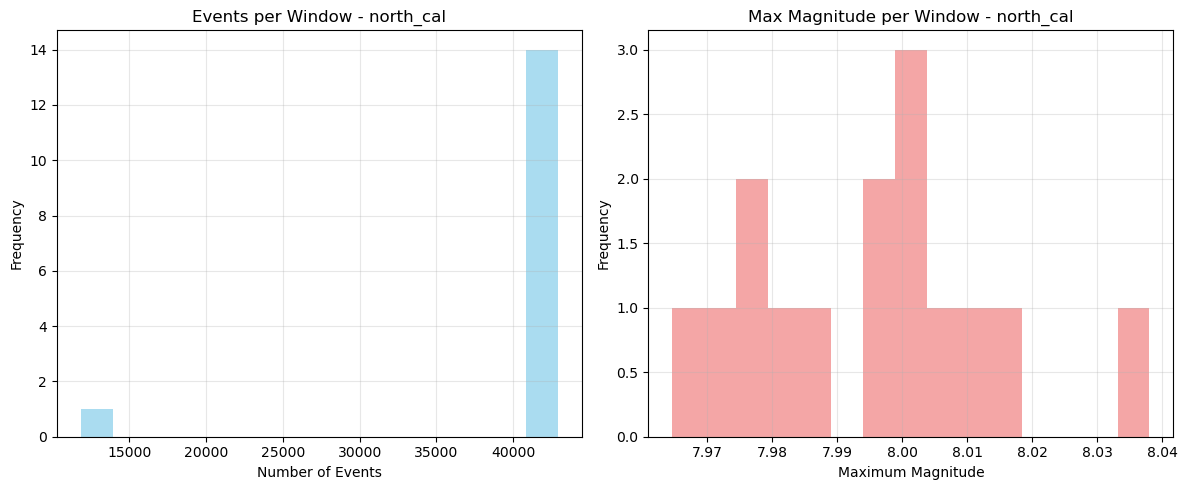

✓ Region north_cal completed successfully

Processing Region: MID_ANGELES

Loading: mid_angeles_hypocenter_M5.0plus.csv
  Original events: 56492
  Converted time from seconds to years
  Time span: 714026.5 years
  Magnitude range: 5.00 - 7.98
  Events M≥7: 2477

Generating time windows...
  Window 1: 4111 events, time 64977.1 - 114977.1
  Window 2: 4056 events, time 114977.1 - 164977.1
  Window 3: 4080 events, time 164977.1 - 214977.1
  Window 4: 4145 events, time 214977.1 - 264977.1
  Window 5: 4036 events, time 264977.1 - 314977.1
  Window 6: 3785 events, time 314977.1 - 364977.1
  Window 7: 3774 events, time 364977.1 - 414977.1
  Window 8: 3844 events, time 414977.1 - 464977.1
  Window 9: 3929 events, time 464977.1 - 514977.1
  Window 10: 3903 events, time 514977.1 - 564977.1
  Window 11: 3844 events, time 564977.1 - 614977.1
  Window 12: 3985 events, time 614977.1 - 664977.1
  Window 13: 3995 events, time 664977.1 - 714977.1
  Window 14: 3922 events, time 714977.1 - 764977.1
  Wind

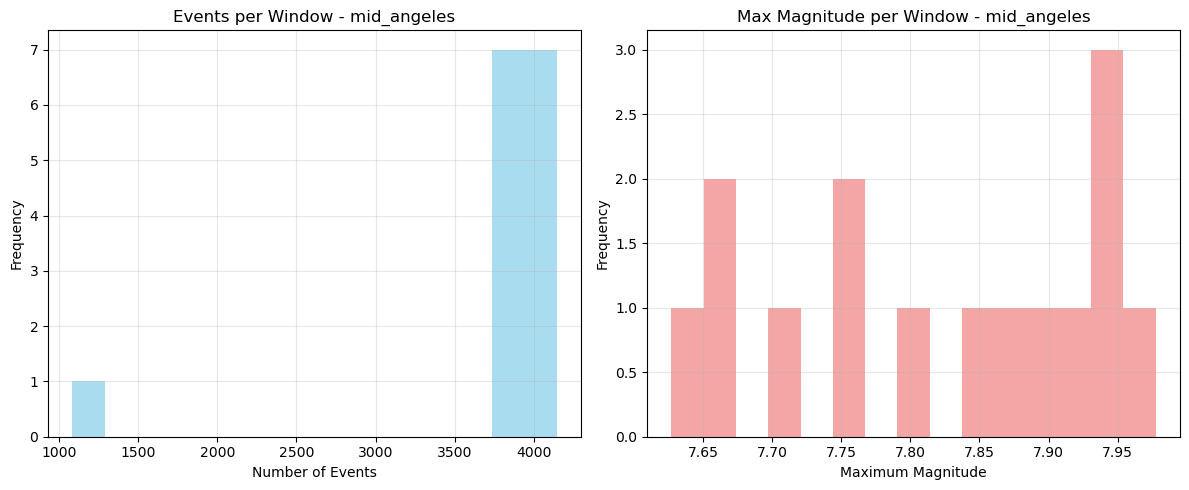

✓ Region mid_angeles completed successfully

Processing Region: CENTRAL_COAST

Loading: central_coast_hypocenter_M5.0plus.csv
  Original events: 531187
  Converted time from seconds to years
  Time span: 714025.7 years
  Magnitude range: 5.00 - 8.00
  Events M≥7: 9053

Generating time windows...
  Window 1: 36846 events, time 64970.8 - 114970.8
  Window 2: 37307 events, time 114970.8 - 164970.8
  Window 3: 36918 events, time 164970.8 - 214970.8
  Window 4: 37193 events, time 214970.8 - 264970.8
  Window 5: 37018 events, time 264970.8 - 314970.8
  Window 6: 37374 events, time 314970.8 - 364970.8
  Window 7: 37464 events, time 364970.8 - 414970.8
  Window 8: 37317 events, time 414970.8 - 464970.8
  Window 9: 37727 events, time 464970.8 - 514970.8
  Window 10: 36981 events, time 514970.8 - 564970.8
  Window 11: 37146 events, time 564970.8 - 614970.8
  Window 12: 37016 events, time 614970.8 - 664970.8
  Window 13: 37042 events, time 664970.8 - 714970.8
  Window 14: 37409 events, time 71497

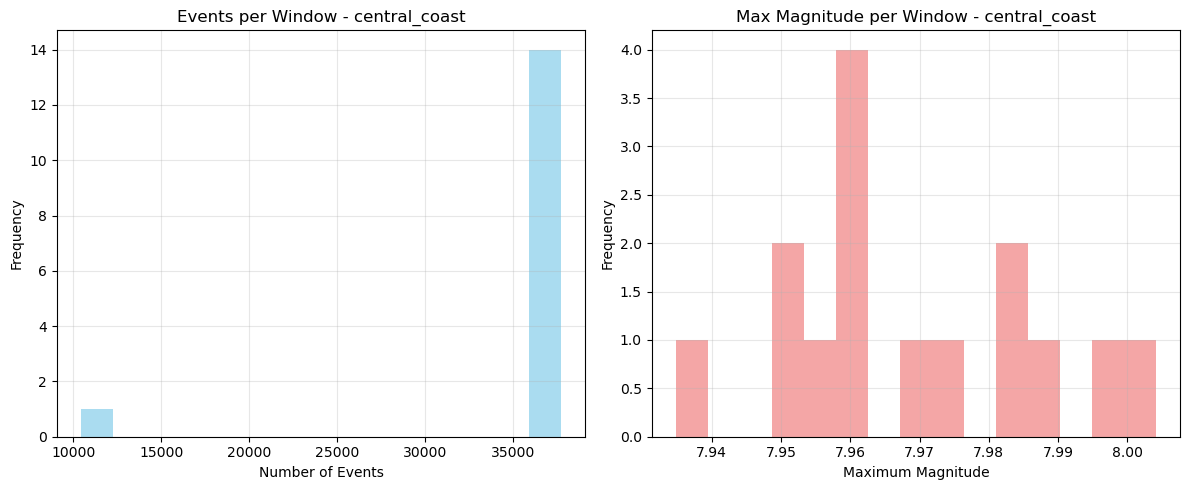

✓ Region central_coast completed successfully

Processing Region: FULL_CALIFORNIA

Loading: Full_california_hypocenter_M5.0plus.csv
  Original events: 5683450
  Converted time from seconds to years
  Time span: 714033.7 years
  Magnitude range: 5.00 - 8.06
  Events M≥7: 91777

Generating time windows...
  Window 1: 397319 events, time 64970.4 - 114970.4
  Window 2: 397430 events, time 114970.4 - 164970.4
  Window 3: 397577 events, time 164970.4 - 214970.4
  Window 4: 396657 events, time 214970.4 - 264970.4
  Window 5: 397317 events, time 264970.4 - 314970.4
  Window 6: 397897 events, time 314970.4 - 364970.4
  Window 7: 397142 events, time 364970.4 - 414970.4
  Window 8: 398918 events, time 414970.4 - 464970.4
  Window 9: 399831 events, time 464970.4 - 514970.4
  Window 10: 397956 events, time 514970.4 - 564970.4
  Window 11: 399184 events, time 564970.4 - 614970.4
  Window 12: 397989 events, time 614970.4 - 664970.4
  Window 13: 397289 events, time 664970.4 - 714970.4
  Window 14: 399

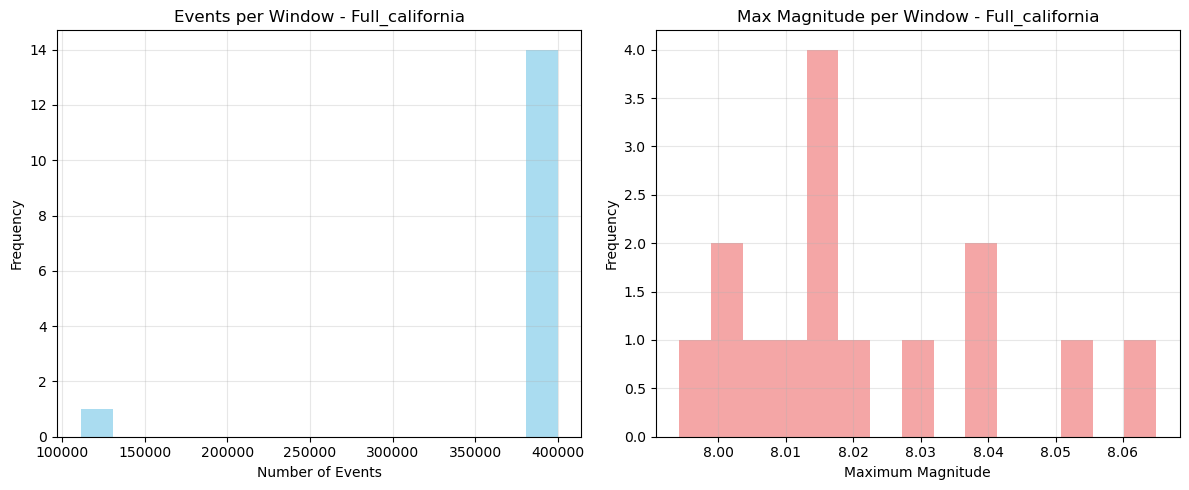

✓ Region Full_california completed successfully


In [5]:
# Process each region
successful_regions = {}
failed_regions = {}

for region_name, csv_path in regional_csv_files.items():
    print(f"\n{'='*50}")
    print(f"Processing Region: {region_name.upper()}")
    print(f"{'='*50}")
    
    try:
        # Load and prepare the CSV
        catalog_df = prepare_csv_for_time_windows(csv_path)
        
        if catalog_df is None:
            failed_regions[region_name] = "Failed to load/prepare CSV"
            continue
        
        # Create output directory for this region
        region_output_dir = os.path.join(OUTPUT_DIR, region_name)
        os.makedirs(region_output_dir, exist_ok=True)
        
        # Generate sequential time windows
        print(f"\nGenerating time windows...")
        seq_output_dir = os.path.join(region_output_dir, "sequential")
        
        seq_windows = generate_sequential_windows(
            df=catalog_df,
            time_col='Occurrence Time (s)',
            window_length_years=WINDOW_LENGTH_YEARS,
            overlap=OVERLAP_FRACTION,
            min_events=MIN_EVENTS_PER_WINDOW
        )
        
        if seq_windows:
            seq_meta_path = save_windows(
                windows=seq_windows,
                output_dir=seq_output_dir,
                prefix=f"{region_name}_seq_window",
                mag_col='Magnitude'  # Use original column name
            )
            print(f"✓ Created {len(seq_windows)} sequential windows")
        else:
            print(f"⚠️ No sequential windows created")
            seq_meta_path = None
        
         # Load metadata
        if seq_meta_path:
            seq_meta = pd.read_csv(seq_meta_path)
        else:
            seq_meta = pd.DataFrame()
        
        # Create statistics plot
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        
        axes[0].hist(seq_meta['num_events'], bins=min(20, len(seq_meta)), alpha=0.7, color='skyblue')
        axes[0].set_title(f"Events per Window - {region_name}")
        axes[0].set_xlabel("Number of Events")
        axes[0].set_ylabel("Frequency")
        axes[0].grid(True, alpha=0.3)
        
        axes[1].hist(seq_meta['max_magnitude'], bins=min(20, len(seq_meta)), alpha=0.7, color='lightcoral')
        axes[1].set_title(f"Max Magnitude per Window - {region_name}")
        axes[1].set_xlabel("Maximum Magnitude")
        axes[1].set_ylabel("Frequency")
        axes[1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plot_path = os.path.join(region_output_dir, f"{region_name}_window_statistics.png")
        plt.savefig(plot_path, dpi=300, bbox_inches='tight')
        plt.show()
        
        # Export file list
        paths_file = os.path.join(seq_output_dir, f"{region_name}_window_paths.txt")
        with open(paths_file, 'w') as f:
            for fpath in seq_meta['filepath']:
                f.write(f"{fpath}\n")
        
        # Store success info
        successful_regions[region_name] = {
            'num_windows': len(seq_windows) if seq_windows else 0,
            'total_events': len(catalog_df),
            'output_dir': region_output_dir,
            'metadata': seq_meta,
            'seq_metadata': seq_meta
        }
        
        print(f"✓ Region {region_name} completed successfully")
        
    except Exception as e:
        print(f"❌ Failed to process {region_name}: {e}")
        failed_regions[region_name] = str(e)
        continue

In [6]:
# =============================================================================
# STEP 4: SUMMARY REPORT
# =============================================================================

print(f"\n{'='*60}")
print("PROCESSING SUMMARY")
print(f"{'='*60}")

if successful_regions:
    print(f"\n✅ Successfully processed {len(successful_regions)} regions:")
    
    total_windows = 0
    total_events = 0
    
    for region_name, info in successful_regions.items():
        print(f"\n{region_name.upper()}:")
        print(f"  Events: {info['total_events']:,}")
        print(f"  Windows: {info['num_windows']}")
        print(f"  Output: {info['output_dir']}")
        
        total_windows += info['num_windows']
        total_events += info['total_events']
    
    print(f"\nTOTALS:")
    print(f"  Total events processed: {total_events:,}")
    print(f"  Total windows created: {total_windows}")
    print(f"  Window length: {WINDOW_LENGTH_YEARS:,} years each")
    
    # Create overall summary CSV
    summary_data = []
    for region_name, info in successful_regions.items():
        meta = info['metadata']
        summary_data.append({
            'region': region_name,
            'total_events': info['total_events'],
            'num_windows': info['num_windows'],
            'min_events_per_window': meta['num_events'].min(),
            'max_events_per_window': meta['num_events'].max(),
            'mean_events_per_window': meta['num_events'].mean(),
            'min_magnitude': meta['min_magnitude'].min(),
            'max_magnitude': meta['max_magnitude'].max(),
            'output_directory': info['output_dir']
        })
    
    summary_df = pd.DataFrame(summary_data)
    summary_path = os.path.join(OUTPUT_DIR, "regional_windows_summary.csv")
    summary_df.to_csv(summary_path, index=False)
    print(f"\n✓ Summary saved to: {summary_path}")
    
    # Display the summary table
    print(f"\nSUMMARY TABLE:")
    print(summary_df.to_string(index=False))

else:
    print("\n❌ No regions were successfully processed!")

if failed_regions:
    print(f"\n❌ Failed regions ({len(failed_regions)}):")
    for region_name, error in failed_regions.items():
        print(f"  {region_name}: {error}")

print(f"\n{'='*60}")
print("NEXT STEPS:")
print(f"{'='*60}")
print("1. Check the window files in each region's 'sequential' folder")
print("2. Use the '*_window_paths.txt' files to access individual windows")
print("3. Each window is a CSV file with the same format as the original")
print("4. Window files are named: {region}_seq_window_001.csv, etc.")
print(f"5. All outputs are in: {OUTPUT_DIR}")


PROCESSING SUMMARY

✅ Successfully processed 7 regions:

SAN_FRANCISCO:
  Events: 2,491,359
  Windows: 15
  Output: ../data/Catalog_4983/windows/san_francisco

MOJAVE:
  Events: 570,570
  Windows: 15
  Output: ../data/Catalog_4983/windows/mojave

LOS_ANGELES:
  Events: 632,011
  Windows: 15
  Output: ../data/Catalog_4983/windows/los_angeles

NORTH_CAL:
  Events: 607,736
  Windows: 15
  Output: ../data/Catalog_4983/windows/north_cal

MID_ANGELES:
  Events: 56,492
  Windows: 15
  Output: ../data/Catalog_4983/windows/mid_angeles

CENTRAL_COAST:
  Events: 531,187
  Windows: 15
  Output: ../data/Catalog_4983/windows/central_coast

FULL_CALIFORNIA:
  Events: 5,683,450
  Windows: 15
  Output: ../data/Catalog_4983/windows/Full_california

TOTALS:
  Total events processed: 10,572,805
  Total windows created: 105
  Window length: 50,000 years each

✓ Summary saved to: ../data/Catalog_4983/windows/regional_windows_summary.csv

SUMMARY TABLE:
         region  total_events  num_windows  min_events

In [7]:
# =============================================================================
# STEP 5: EXAMPLE - HOW TO USE THE WINDOWS
# =============================================================================

if successful_regions:
    print(f"\n{'='*60}")
    print("EXAMPLE: HOW TO USE THE GENERATED WINDOWS")
    print(f"{'='*60}")
    
    # Pick the first successful region as an example
    example_region = list(successful_regions.keys())[0]
    example_info = successful_regions[example_region]
    
    print(f"\nExample using {example_region} region:")
    
    # Load the first window as an example
    seq_dir = os.path.join(example_info['output_dir'], 'sequential')
    window_files = sorted([f for f in os.listdir(seq_dir) if f.endswith('.csv')])
    
    if window_files:
        example_window_path = os.path.join(seq_dir, window_files[0])
        example_window = pd.read_csv(example_window_path)
        
        print(f"\nFirst window file: {window_files[0]}")
        print(f"Events in this window: {len(example_window)}")
        print(f"Time range: {example_window['Occurrence Time (s)'].min():.1f} - {example_window['Occurrence Time (s)'].max():.1f}")
        print(f"Magnitude range: {example_window['Magnitude'].min():.2f} - {example_window['Magnitude'].max():.2f}")

        print(f"\nFirst few events in this window:")
        print(example_window[['Occurrence Time (s)', 'Magnitude', 'Hypocenter Latitude', 'Hypocenter Longitude']].head())
        
        print(f"\nTo load all windows for {example_region}:")
        print(f"```python")
        print(f"import pandas as pd")
        print(f"import os")
        print(f"")
        print(f"# Load all windows for {example_region}")
        print(f"seq_dir = '{seq_dir}'")
        print(f"window_files = [f for f in os.listdir(seq_dir) if f.endswith('.csv')]")
        print(f"")
        print(f"for window_file in sorted(window_files):")
        print(f"    window_path = os.path.join(seq_dir, window_file)")
        print(f"    window_data = pd.read_csv(window_path)")
        print(f"    print(f'{{window_file}}: {{len(window_data)}} events')")
        print(f"```")

print(f"\n{'='*60}")
print("PROCESSING COMPLETE! 🎉")
print(f"{'='*60}")


EXAMPLE: HOW TO USE THE GENERATED WINDOWS

Example using san_francisco region:

First window file: san_francisco_seq_window_0001.csv
Events in this window: 174424
Time range: 64971.9 - 114970.6
Magnitude range: 5.00 - 7.98

First few events in this window:
   Occurrence Time (s)  Magnitude  Hypocenter Latitude  Hypocenter Longitude
0         64971.884569   5.234360            38.214622            -122.45996
1         64972.218037   6.371474            36.712630            -121.33352
2         64972.232034   5.111299            36.579735            -121.64503
3         64972.232034   5.561941            36.572754            -121.66025
4         64972.232396   5.227894            36.560066            -121.67402

To load all windows for san_francisco:
```python
import pandas as pd
import os

# Load all windows for san_francisco
seq_dir = '../data/Catalog_4983/windows/san_francisco/sequential'
window_files = [f for f in os.listdir(seq_dir) if f.endswith('.csv')]

for window_file in sorted

In [8]:
# =============================================================================
# ADDITIONAL CELLS: RANDOM TIME WINDOWS GENERATION
# Add these cells to your existing notebook after the sequential processing
# =============================================================================

# Cell: Random Window Configuration
print(f"\n{'='*60}")
print("GENERATING RANDOM TIME WINDOWS")
print(f"{'='*60}")

# Random window parameters (reuse existing variables where possible)
NUM_RANDOM_SAMPLES = 100
RANDOM_SEED = 42

print(f"Generating {NUM_RANDOM_SAMPLES} random windows per region")
print(f"Using random seed: {RANDOM_SEED}")
print(f"Window length: {WINDOW_LENGTH_YEARS:,} years")


GENERATING RANDOM TIME WINDOWS
Generating 100 random windows per region
Using random seed: 42
Window length: 50,000 years


In [9]:
# =============================================================================

for region_name, info in successful_regions.items():
    print(f"\n{'='*40}")
    print(f"Adding Random Windows: {region_name.upper()}")
    print(f"{'='*40}")
    
    try:
        # Find the original CSV file for this region
        region_csv = None
        for csv_name, csv_path in regional_csv_files.items():
            if csv_name == region_name:
                region_csv = csv_path
                break
        
        if region_csv is None:
            print(f"❌ Could not find CSV file for {region_name}")
            continue
        
        # Reload the data
        catalog_df = prepare_csv_for_time_windows(region_csv)
        
        if catalog_df is None:
            print(f"❌ Failed to reload data for {region_name}")
            continue
        
        # Create random windows output directory
        rand_output_dir = os.path.join(info['output_dir'], "random")
        
        # Generate random windows
        print(f"Generating {NUM_RANDOM_SAMPLES} random windows...")
        
        rand_windows = generate_random_windows(
            df=catalog_df,
            time_col='Occurrence Time (s)',  # Use original column name
            window_length_years=WINDOW_LENGTH_YEARS,
            num_samples=NUM_RANDOM_SAMPLES,
            min_events=MIN_EVENTS_PER_WINDOW,
            seed=RANDOM_SEED
        )
        
        if rand_windows:
            rand_meta_path = save_windows(
                windows=rand_windows,
                output_dir=rand_output_dir,
                prefix=f"{region_name}_rand_window",
                mag_col='Magnitude'  # Use original column name
            )
            print(f"✓ Created {len(rand_windows)} random windows")
        else:
            print(f"⚠️ No random windows created")
            rand_meta_path = None
        
        # Load metadata
        if rand_meta_path:
            rand_meta = pd.read_csv(rand_meta_path)
            
            # Update successful_regions with random info
            successful_regions[region_name].update({
                'num_rand_windows': len(rand_windows),
                'rand_metadata': rand_meta
            })
        
    except Exception as e:
        print(f"❌ Error processing {region_name}: {e}")
        import traceback
        traceback.print_exc()
        continue

print(f"\n✅ Window generation completed!")


Adding Random Windows: SAN_FRANCISCO

Loading: san_francisco_hypocenter_M5.0plus.csv
  Original events: 2491359
  Converted time from seconds to years
  Time span: 714032.3 years
  Magnitude range: 5.00 - 8.06
  Events M≥7: 17474
Generating 100 random windows...
  Generated 10/100 random windows...
  Generated 20/100 random windows...
  Generated 30/100 random windows...
  Generated 40/100 random windows...
  Generated 50/100 random windows...
  Generated 60/100 random windows...
  Generated 70/100 random windows...
  Generated 80/100 random windows...
  Generated 90/100 random windows...
  Generated 100/100 random windows...
  Saved 100 windows to ../data/Catalog_4983/windows/san_francisco/random
  Metadata: ../data/Catalog_4983/windows/san_francisco/random/window_metadata.csv
✓ Created 100 random windows

Adding Random Windows: MOJAVE

Loading: mojave_hypocenter_M5.0plus.csv
  Original events: 570570
  Converted time from seconds to years
  Time span: 714032.5 years
  Magnitude rang

In [14]:
# Cell: Create Random vs Sequential Comparison Plots
print(f"\n{'='*60}")
print("CREATING COMPARISON VISUALIZATIONS")
print(f"{'='*60}")

for region_name in random_results.keys():
    if region_name not in successful_regions:
        continue
        
    print(f"\nCreating comparison plot for {region_name}...")
    
    # Get metadata for both window types
    seq_meta = successful_regions[region_name]['seq_metadata']
    rand_meta = random_results[region_name]['rand_metadata']
    
    # Create comprehensive comparison plot
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Events per window comparison
    axes[0,0].hist(seq_meta['num_events'], bins=min(20, len(seq_meta)), alpha=0.7, 
                  color='skyblue', label='Sequential', density=True)
    axes[0,0].hist(rand_meta['num_events'], bins=min(20, len(rand_meta)), alpha=0.7, 
                  color='lightcoral', label='Random', density=True)
    axes[0,0].set_title(f"Events per Window - {region_name}")
    axes[0,0].set_xlabel("Number of Events")
    axes[0,0].set_ylabel("Density")
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)
    
    # Max magnitude comparison
    axes[0,1].hist(seq_meta['max_magnitude'], bins=min(20, len(seq_meta)), alpha=0.7, 
                  color='skyblue', label='Sequential', density=True)
    axes[0,1].hist(rand_meta['max_magnitude'], bins=min(20, len(rand_meta)), alpha=0.7, 
                  color='lightcoral', label='Random', density=True)
    axes[0,1].set_title(f"Max Magnitude per Window - {region_name}")
    axes[0,1].set_xlabel("Maximum Magnitude")
    axes[0,1].set_ylabel("Density")
    axes[0,1].legend()
    axes[0,1].grid(True, alpha=0.3)
    
    # Window start times comparison
    axes[1,0].hist(seq_meta['start_time'], bins=min(20, len(seq_meta)), alpha=0.7, 
                  color='skyblue', label='Sequential', density=True)
    axes[1,0].hist(rand_meta['start_time'], bins=min(20, len(rand_meta)), alpha=0.7, 
                  color='lightcoral', label='Random', density=True)
    axes[1,0].set_title(f"Window Start Times - {region_name}")
    axes[1,0].set_xlabel("Start Time (seconds)")
    axes[1,0].set_ylabel("Density")
    axes[1,0].legend()
    axes[1,0].grid(True, alpha=0.3)
    
    # Summary statistics comparison
    seq_stats = f"Sequential Windows ({len(seq_meta)}):\n"
    seq_stats += f"Events: {seq_meta['num_events'].mean():.1f} ± {seq_meta['num_events'].std():.1f}\n"
    seq_stats += f"Max Mag: {seq_meta['max_magnitude'].mean():.2f} ± {seq_meta['max_magnitude'].std():.2f}\n"
    seq_stats += f"Time Span: {(seq_meta['start_time'].max() - seq_meta['start_time'].min()) / (365.25*24*3600):.1f} yrs"
    
    rand_stats = f"Random Windows ({len(rand_meta)}):\n"
    rand_stats += f"Events: {rand_meta['num_events'].mean():.1f} ± {rand_meta['num_events'].std():.1f}\n"
    rand_stats += f"Max Mag: {rand_meta['max_magnitude'].mean():.2f} ± {rand_meta['max_magnitude'].std():.2f}\n"
    rand_stats += f"Time Span: {(rand_meta['start_time'].max() - rand_meta['start_time'].min()) / (365.25*24*3600):.1f} yrs"
    
    axes[1,1].text(0.05, 0.75, seq_stats, transform=axes[1,1].transAxes, fontsize=10, 
                  verticalalignment='top', bbox=dict(boxstyle="round", facecolor='skyblue', alpha=0.7))
    axes[1,1].text(0.05, 0.35, rand_stats, transform=axes[1,1].transAxes, fontsize=10, 
                  verticalalignment='top', bbox=dict(boxstyle="round", facecolor='lightcoral', alpha=0.7))
    axes[1,1].set_title(f"Summary Statistics - {region_name}")
    axes[1,1].axis('off')
    
    plt.tight_layout()
    
    # Save comparison plot
    comparison_plot_path = os.path.join(successful_regions[region_name]['output_dir'], 
                                       f"{region_name}_seq_vs_rand_comparison.png")
    plt.savefig(comparison_plot_path, dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"✓ Saved comparison plot: {comparison_plot_path}")


CREATING COMPARISON VISUALIZATIONS

Creating comparison plot for mojave...


KeyError: 'seq_metadata'

In [11]:
# =============================================================================

# Cell: Update Summary Statistics
print(f"\n{'='*60}")
print("FINAL SUMMARY WITH RANDOM WINDOWS")
print(f"{'='*60}")

# Update successful_regions with random window information
for region_name, rand_info in random_results.items():
    if region_name in successful_regions:
        successful_regions[region_name].update({
            'num_rand_windows': rand_info['num_rand_windows'],
            'rand_metadata': rand_info['rand_metadata']
        })

# Display comprehensive summary
total_seq_windows = 0
total_rand_windows = 0
total_events = 0

print(f"\n✅ COMPLETE PROCESSING SUMMARY:")
for region_name, info in successful_regions.items():
    if region_name in random_results:
        print(f"\n{region_name.upper()}:")
        print(f"  Events: {info['total_events']:,}")
        print(f"  Sequential windows: {info.get('num_seq_windows', info.get('num_windows', 0))}")
        print(f"  Random windows: {info.get('num_rand_windows', 0)}")
        print(f"  Output: {info['output_dir']}")
        
        total_seq_windows += info.get('num_seq_windows', info.get('num_windows', 0))
        total_rand_windows += info.get('num_rand_windows', 0)
        total_events += info['total_events']

print(f"\nFINAL TOTALS:")
print(f"  Total events processed: {total_events:,}")
print(f"  Total sequential windows: {total_seq_windows}")
print(f"  Total random windows: {total_rand_windows}")
print(f"  Total windows (both types): {total_seq_windows + total_rand_windows}")


FINAL SUMMARY WITH RANDOM WINDOWS

✅ COMPLETE PROCESSING SUMMARY:

MOJAVE:
  Events: 570,570
  Sequential windows: 14
  Random windows: 100
  Output: ../data/Catalog_4983/windows/mojave

MID_ANGELES:
  Events: 56,492
  Sequential windows: 14
  Random windows: 100
  Output: ../data/Catalog_4983/windows/mid_angeles

SAN_FRANCISCO:
  Events: 2,491,359
  Sequential windows: 14
  Random windows: 100
  Output: ../data/Catalog_4983/windows/san_francisco

NORTH_CAL:
  Events: 607,736
  Sequential windows: 14
  Random windows: 100
  Output: ../data/Catalog_4983/windows/north_cal

CENTRAL_COAST:
  Events: 531,187
  Sequential windows: 14
  Random windows: 100
  Output: ../data/Catalog_4983/windows/central_coast

FULL_CALIFORNIA:
  Events: 5,683,450
  Sequential windows: 14
  Random windows: 100
  Output: ../data/Catalog_4983/windows/Full_california

LOS_ANGELES:
  Events: 632,011
  Sequential windows: 14
  Random windows: 100
  Output: ../data/Catalog_4983/windows/los_angeles

FINAL TOTALS:
  T

In [12]:
# =============================================================================

# Cell: Create Enhanced Summary CSV
enhanced_summary_data = []
for region_name, info in successful_regions.items():
    if region_name in random_results:
        seq_meta = info.get('seq_metadata', info.get('metadata'))
        rand_meta = info.get('rand_metadata')
        
        enhanced_summary_data.append({
            'region': region_name,
            'total_events': info['total_events'],
            'num_seq_windows': info.get('num_seq_windows', info.get('num_windows', 0)),
            'num_rand_windows': info.get('num_rand_windows', 0),
            'seq_mean_events': seq_meta['num_events'].mean() if seq_meta is not None else 0,
            'rand_mean_events': rand_meta['num_events'].mean() if rand_meta is not None else 0,
            'seq_max_magnitude': seq_meta['max_magnitude'].max() if seq_meta is not None else 0,
            'rand_max_magnitude': rand_meta['max_magnitude'].max() if rand_meta is not None else 0,
            'seq_std_events': seq_meta['num_events'].std() if seq_meta is not None else 0,
            'rand_std_events': rand_meta['num_events'].std() if rand_meta is not None else 0,
            'output_directory': info['output_dir']
        })

enhanced_summary_df = pd.DataFrame(enhanced_summary_data)
enhanced_summary_path = os.path.join(OUTPUT_DIR, "complete_windows_summary.csv")
enhanced_summary_df.to_csv(enhanced_summary_path, index=False)
print(f"\n✓ Enhanced summary saved to: {enhanced_summary_path}")

# Display summary table
print(f"\nCOMPLETE SUMMARY TABLE:")
display_cols = ['region', 'total_events', 'num_seq_windows', 'num_rand_windows', 
               'seq_mean_events', 'rand_mean_events']
print(enhanced_summary_df[display_cols].round(1).to_string(index=False))

# =============================================================================


✓ Enhanced summary saved to: ../data/Catalog_4983/windows/complete_windows_summary.csv

COMPLETE SUMMARY TABLE:
         region  total_events  num_seq_windows  num_rand_windows  seq_mean_events  rand_mean_events
         mojave        570570               14               100          39968.8           39934.1
    mid_angeles         56492               14               100           3957.8            3963.5
  san_francisco       2491359               14               100         174438.6          174399.8
      north_cal        607736               14               100          42564.5           42523.2
  central_coast        531187               14               100          37197.0           37185.1
Full_california       5683450               14               100         398007.9          397932.3
    los_angeles        632011               14               100          44261.1           44275.4


In [13]:
# Cell: Usage Examples
print(f"\n{'='*60}")
print("USAGE EXAMPLES - BOTH WINDOW TYPES")
print(f"{'='*60}")

if successful_regions and random_results:
    example_region = list(random_results.keys())[0]
    example_info = successful_regions[example_region]
    
    print(f"\nExample using {example_region} region:")
    
    seq_dir = os.path.join(example_info['output_dir'], 'sequential')
    rand_dir = os.path.join(example_info['output_dir'], 'random')
    
    print(f"\n📁 DIRECTORY STRUCTURE:")
    print(f"Sequential windows: {seq_dir}")
    print(f"Random windows: {rand_dir}")
    
    # Show file counts
    seq_files = [f for f in os.listdir(seq_dir) if f.endswith('.csv')]
    rand_files = [f for f in os.listdir(rand_dir) if f.endswith('.csv')]
    
    print(f"\n📊 FILE COUNTS:")
    print(f"Sequential: {len(seq_files)} windows")
    print(f"Random: {len(rand_files)} windows")
    
    # Load example windows
    if seq_files and rand_files:
        seq_example = pd.read_csv(os.path.join(seq_dir, seq_files[0]))
        rand_example = pd.read_csv(os.path.join(rand_dir, rand_files[0]))
        
        print(f"\n🔄 COMPARISON OF FIRST WINDOWS:")
        print(f"Sequential {seq_files[0]}:")
        print(f"  Events: {len(seq_example)}")
        print(f"  Time: {seq_example['time'].min():.1f} - {seq_example['time'].max():.1f}")
        print(f"  Mag: {seq_example['magnitude'].min():.2f} - {seq_example['magnitude'].max():.2f}")
        
        print(f"\nRandom {rand_files[0]}:")
        print(f"  Events: {len(rand_example)}")
        print(f"  Time: {rand_example['time'].min():.1f} - {rand_example['time'].max():.1f}")
        print(f"  Mag: {rand_example['magnitude'].min():.2f} - {rand_example['magnitude'].max():.2f}")

print(f"\n{'='*60}")
print("✅ RANDOM WINDOWS SUCCESSFULLY ADDED!")
print(f"{'='*60}")
print("You now have both sequential and random time windows for each region.")
print("Use sequential windows for temporal analysis and random windows for statistical sampling.")


USAGE EXAMPLES - BOTH WINDOW TYPES

Example using mojave region:

📁 DIRECTORY STRUCTURE:
Sequential windows: ../data/Catalog_4983/windows/mojave/sequential
Random windows: ../data/Catalog_4983/windows/mojave/random

📊 FILE COUNTS:
Sequential: 15 windows
Random: 101 windows

🔄 COMPARISON OF FIRST WINDOWS:
Sequential mojave_seq_window_0004.csv:
  Events: 39353
  Time: 6784006869824.9 - 8361864776559.2
  Mag: 5.00 - 7.98

Random mojave_rand_window_0090.csv:
  Events: 40259
  Time: 11945747213829.9 - 13523535874128.2
  Mag: 5.00 - 7.98

✅ RANDOM WINDOWS SUCCESSFULLY ADDED!
You now have both sequential and random time windows for each region.
Use sequential windows for temporal analysis and random windows for statistical sampling.
